In [1]:
import numpy as np
import pandas as pd
import session_info
from lifelines import KaplanMeierFitter
from matplotlib.pyplot import subplots
from sksurv.nonparametric import kaplan_meier_estimator
session_info.show()

In [20]:
#Loading the dataset from a CSV file
df = pd.read_csv('Book1CSV.csv')
df.head()

,Patient ID,Date of Birth,Age,Gender,Date of Diagnosis,Date of Death,Date of Last Follow-Up,Date of Admission,Date of Discharge,Disease Stage,Treatment Received,Comorbidities,Smoking Status,Family History,Vital Signs
0,P-001,15-05-1990,32,Male,10-01-2022,NaN,01-06-2022,10-01-2022,20-01-2022,Stage II,Surgery,Hypertension,Non-Smoker,None,120/80
1,P-002,22-09-1975,47,Female,05-11-2022,20-03-2023,20-03-2023,05-11-2022,20-03-2023,Stage III,Chemotherapy,Diabetes,Former Smoker,Breast Cancer,130/70
2,P-003,12-12-1988,33,Male,20-07-2022,NaN,15-12-2023,20-07-2022,29-08-2023,Stage I,Observation,NaN,Non-Smoker,None,115/75
3,P-004,30-03-1965,56,Male,08-09-2022,05-01-2023,05-01-2023,08-09-2022,05-01-2023,Stage IV,Radiation Therapy,Hypertension,Smoker,None,140/90
4,P-005,25-06-1980,41,Female,12-04-2023,NaN,12-10-2023,12-04-2023,16-05-2023,Stage II,Surgery,NaN,Non-Smoker,None,125/80


In [22]:
#Preprocessing the data
df["Status"] = df["Date of Death"]
df["Status"] = df["Status"].notnull().astype(int)
df["Time"] = (pd.to_datetime(df['Date of Last Follow-Up'], format='%d-%m-%Y') - pd.to_datetime(df['Date of Diagnosis'], format='%d-%m-%Y')).dt.days
df.to_csv("Transformed Data.csv", encoding='utf-8')
T = df["Time"]
E = df["Status"]
df.head()

,Patient ID,Date of Birth,Age,Gender,Date of Diagnosis,Date of Death,Date of Last Follow-Up,Date of Admission,Date of Discharge,Disease Stage,Treatment Received,Comorbidities,Smoking Status,Family History,Vital Signs,Status,Time
0,P-001,15-05-1990,32,Male,10-01-2022,NaN,01-06-2022,10-01-2022,20-01-2022,Stage II,Surgery,Hypertension,Non-Smoker,None,120/80,0,142
1,P-002,22-09-1975,47,Female,05-11-2022,20-03-2023,20-03-2023,05-11-2022,20-03-2023,Stage III,Chemotherapy,Diabetes,Former Smoker,Breast Cancer,130/70,1,135
2,P-003,12-12-1988,33,Male,20-07-2022,NaN,15-12-2023,20-07-2022,29-08-2023,Stage I,Observation,NaN,Non-Smoker,None,115/75,0,513
3,P-004,30-03-1965,56,Male,08-09-2022,05-01-2023,05-01-2023,08-09-2022,05-01-2023,Stage IV,Radiation Therapy,Hypertension,Smoker,None,140/90,1,119
4,P-005,25-06-1980,41,Female,12-04-2023,NaN,12-10-2023,12-04-2023,16-05-2023,Stage II,Surgery,NaN,Non-Smoker,None,125/80,0,183


In [3]:
#Performing Kaplan-Meier survival analysis
kmf = KaplanMeierFitter()
km_cancer = kmf.fit(T,E)

In [4]:
#Calculating the survival probabilities over time

In [23]:
print(km_cancer.median_survival_time_)
print(km_cancer.survival_function_)

502.0
          KM_estimate
timeline             
-319.0       1.000000
 0.0         1.000000
 5.0         1.000000
 14.0        1.000000
 30.0        1.000000
 31.0        1.000000
 53.0        1.000000
 56.0        1.000000
 57.0        1.000000
 61.0        1.000000
 67.0        1.000000
 69.0        1.000000
 71.0        1.000000
 76.0        1.000000
 77.0        0.975610
 84.0        0.975610
 85.0        0.950594
 93.0        0.950594
 95.0        0.950594
 119.0       0.924189
 124.0       0.897783
 135.0       0.871378
 142.0       0.871378
 153.0       0.871378
 155.0       0.871378
 157.0       0.871378
 183.0       0.871378
 184.0       0.871378
 194.0       0.871378
 209.0       0.836523
 212.0       0.836523
 230.0       0.800152
 235.0       0.763782
 244.0       0.763782
 276.0       0.725593
 303.0       0.725593
 304.0       0.725593
 339.0       0.640229
 359.0       0.640229
 365.0       0.640229
 395.0       0.640229
 446.0       0.586876
 482.0       0.533524
 502

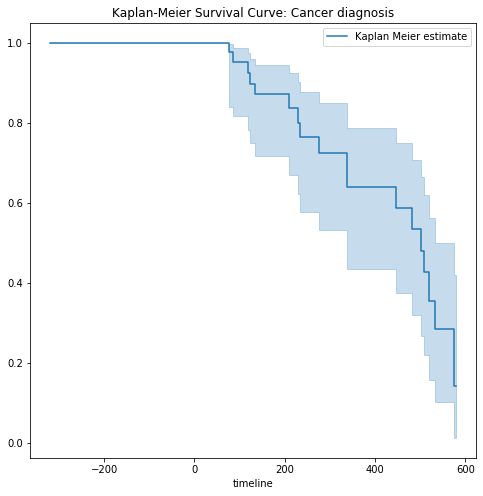

In [24]:
#Plotting the result
fig, ax = subplots(figsize=(8,8))
km_cancer.plot(title='Kaplan-Meier Survival Curve: Cancer diagnosis', label='Kaplan Meier estimate', ax=ax)

502.0
          KM_estimate
timeline             
-319.0       1.000000
 0.0         1.000000
 5.0         1.000000
 14.0        1.000000
 30.0        1.000000
 31.0        1.000000
 53.0        1.000000
 56.0        1.000000
 57.0        1.000000
 61.0        1.000000
 67.0        1.000000
 69.0        1.000000
 71.0        1.000000
 76.0        1.000000
 77.0        0.975610
 84.0        0.975610
 85.0        0.950594
 93.0        0.950594
 95.0        0.950594
 119.0       0.924189
 124.0       0.897783
 135.0       0.871378
 142.0       0.871378
 153.0       0.871378
 155.0       0.871378
 157.0       0.871378
 183.0       0.871378
 184.0       0.871378
 194.0       0.871378
 209.0       0.836523
 212.0       0.836523
 230.0       0.800152
 235.0       0.763782
 244.0       0.763782
 276.0       0.725593
 303.0       0.725593
 304.0       0.725593
 339.0       0.640229
 359.0       0.640229
 365.0       0.640229
 395.0       0.640229
 446.0       0.586876
 482.0       0.533524
 502